# Scaffold analysis of ChEMBL data with pandas and RDKit
## Presentation/tutorial given at [RDKit UGM](https://github.com/rdkit/UGM_2014), October 2014, Darmstadt
### Dr. Samo Turk
#### BioMed X Innovation Center, Heidelberg  
<img src="files/biomedx.png">  

<p style="font-size:20px;"><strong>Python</strong></p>
<p style="font-size:20px;">[Python](http://www.python.org/) very popular programming language especially in science.</p>

<p style="font-size:20px;"><strong>pandas</strong></p>
<p style="font-size:20px;">[Pandas](http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.  
No need for R!</p>

<p style="font-size:20px;"><strong>RDKit</strong></p>
<p style="font-size:20px;">[RDKit](http://www.rdkit.org/) is an open source chemistry toolkit.</p>

<p style="font-size:20px;"><strong>IPython</strong></p>
<p style="font-size:20px;">[IPython](http://ipython.org/) interactive Python shell. Has web-based interactive computational environment IPython Notebook.</p>

<p style="font-size:20px;"><strong>chembl_webresource_client</strong></p>
<p style="font-size:20px;">[chembl_webresource_client](https://github.com/chembl/chembl_webresource_client) Python client for accessing ChEMBL webservices.</p>

### More notebooks: https://github.com/Team-SKI/snippets
<br>
<br>
<br>
<br>
<br>
<br>

In [1]:
import pandas as pd # Import pandas
from chembl_webresource_client import *

## chembl_webresource_client

### Targets

Target object handler for API access and check connection to the db

In [2]:
targets = TargetResource()

In [3]:
print targets.status()

True


#### ABL1 kinase 
uniprotID: **P00519**

In [4]:
targets.get(uniprot=['P03372'])

[{u'bioactivityCount': 10666,
  u'chemblId': u'CHEMBL206',
  u'compoundCount': 5809,
  u'description': u'Estrogen receptor alpha',
  u'geneNames': u'Unspecified',
  u'organism': u'Homo sapiens',
  u'preferredName': u'Estrogen receptor alpha',
  u'proteinAccession': u'P03372',
  u'synonyms': u'ESR1,Estradiol receptor,ER,ER-alpha,ESR ,Estrogen receptor,NR3A1,Nuclear receptor subfamily 3 group A member 1',
  u'targetType': u'SINGLE PROTEIN'}]

Load targets in data frame

In [5]:
targetsDF = pd.DataFrame.from_dict(targets.get(uniprot=['P03372']))

In [6]:
targetsDF

,bioactivityCount,chemblId,compoundCount,description,geneNames,organism,preferredName,proteinAccession,synonyms,targetType
0,10666,CHEMBL206,5809,Estrogen receptor alpha,Unspecified,Homo sapiens,Estrogen receptor alpha,P03372,"ESR1,Estradiol receptor,ER,ER-alpha,ESR ,Estro...",SINGLE PROTEIN


## Bioactivities
Download all bioactivities for targets

In [7]:
bioactsDF = pd.DataFrame.from_dict(targets.bioactivities('CHEMBL206'))

In [8]:
bioactsDF.head(1)

,activity_comment,assay_chemblid,assay_description,assay_type,bioactivity_type,ingredient_cmpd_chemblid,name_in_reference,operator,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value
0,Unspecified,CHEMBL677870,Binding affinity for estrogen receptor alpha,B,IC50,CHEMBL219763,4,=,Homo sapiens,CHEMBL219763,"Bioorg. Med. Chem. Lett., (2003) 13:22:4089",CHEMBL206,9,Estrogen receptor alpha,nM,9.57


Filter bioactivities (safe defaults)

In [9]:
bioactsDF = bioactsDF[(bioactsDF['bioactivity_type'] == 'IC50') &  # keep ony IC50
                      (bioactsDF['operator'] == '=') & # only exact measurements
                      (bioactsDF['assay_type'] == 'B') & # only binding data
                      (bioactsDF['target_confidence'] == 9)] # only high target confidence

In [10]:
len(bioactsDF), len(bioactsDF['ingredient_cmpd_chemblid'].unique())

(1605, 1354)

## Compouds

Compound object handler for API access and check connection to the db

In [11]:
compounds = CompoundResource()

In [12]:
compounds.status()

True

Load the compounds in the dataframe

In [13]:
cpdsDF = pd.DataFrame.from_dict(compounds.get(list(bioactsDF['ingredient_cmpd_chemblid'].unique())))

In [14]:
cpdsDF.head()

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,passesRuleOfThree,preferredCompoundName,rotatableBonds,smiles,species,stdInChiKey,synonyms
0,NaN,NaN,NaN,NaN,NaN,CHEMBL219763,No,C8H5B10O,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,No,NaN,1.0,CC1=C(C(=O)c2ccc(O)cc12)c3ccc(O)cc3,NEUTRAL,IOAPPLGKQYAVIJ-UHFFFAOYSA-N,NaN
2,9.72,9.66,3.54,5.74,5.88,CHEMBL180300,No,C27H29NO4S,463.59,1.0,No,NaN,6.0,C[C@@H](COc1ccc(cc1)[C@@H]2Oc3ccc(O)cc3S[C@@H]...,BASE,UZOOIPXOYYJULJ-RHLLTPQKSA-N,NaN
3,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,No,NaN,1.0,Oc1ccc2c(noc2c1)c3cccc4ccc(O)cc34,NEUTRAL,UNFXWFVOAYBQPC-UHFFFAOYSA-N,NaN
4,9.30,NaN,3.73,3.74,3.95,CHEMBL365290,No,C15H12O3,240.25,0.0,No,NaN,1.0,Cc1cc(O)cc2cc(oc12)c3ccc(O)cc3,NEUTRAL,FUWUZPRNKPGRGX-UHFFFAOYSA-N,NaN


In [15]:
bioactsDF['value'] = bioactsDF['value'].astype(float) # making sure everything is float

## Chemoinformatics

In [16]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

In [17]:
molnames = 'chemblId'
smiles = 'smiles'

Add molecule column

In [18]:
cpdsDF = cpdsDF[~cpdsDF['smiles'].isnull()].copy()

In [19]:
PandasTools.AddMoleculeColumnToFrame(cpdsDF, smilesCol='smiles')

In [20]:
cpdsDF = cpdsDF[[molnames, smiles, 'ROMol', 'knownDrug', 'preferredCompoundName']]

#### Add bioactivities and ligand efficiency
Ligand efficiency: *LE = 1.4 x pIC50/HAC*
Not that ligand efficiency might not be scientifically valid: http://fbdd-lit.blogspot.de/search/label/LE

In [21]:
import numpy as np
def getBioacts(cpd, target):
    value = bioactsDF[(bioactsDF['ingredient_cmpd_chemblid'] == cpd)& # All rows of compound AND
                     (bioactsDF['target_chemblid'] == target)]['value'].mean() # target. Get mean of values
    return np.log10(value*10**-9)*-1 # returns pIC50

def getLE(mol, pIC50): 
    return 1.4*pIC50/mol.GetNumHeavyAtoms()        

In [22]:
cpdsDF['pIC50'] = cpdsDF.apply(lambda x: getBioacts(x[molnames], 'CHEMBL206'), axis=1)

In [23]:
cpdsDF['LE'] = cpdsDF.apply(lambda x: getLE(x['ROMol'], x['pIC50']), axis=1)

,chemblId,smiles,ROMol,knownDrug,preferredCompoundName,pIC50,LE
1,CHEMBL370037,CC1=C(C(=O)c2ccc(O)cc12)c3ccc(O)cc3,,No,NaN,8.221849,0.60582

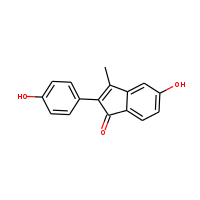

In [24]:
cpdsDF.head(1)

In [25]:
len(cpdsDF)

1346

<br>
<br>
<br>
<br>
## Murcko scaffold decomposition
  
Bemis, G. W.; Murcko, M. A. “The Properties of Known Drugs. 1. Molecular Frameworks.” J. Med. Chem. 39:2887-93 (1996).  

Decomposition of molecules to scaffolds or generic frameworks  

Functionality present in RDKit. Added it to PandasTools 
<br>
<br>
<br>
<br>
<br>
<br>
<br>



In [26]:
from rdkit.Chem.Scaffolds import MurckoScaffold

In [27]:
mol  = Chem.MolFromSmiles(cpdsDF.ix[2]['smiles'])

In [28]:
scaffold = MurckoScaffold.GetScaffoldForMol(mol)
generic = MurckoScaffold.MakeScaffoldGeneric(MurckoScaffold.GetScaffoldForMol(mol))

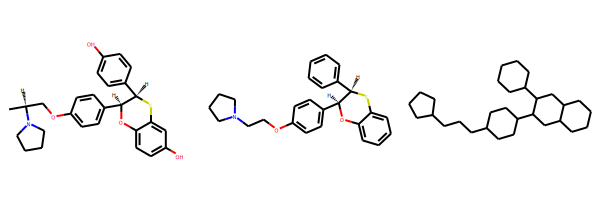

In [29]:
Draw.MolsToGridImage([mol, scaffold, generic])

<br>
<br>
<br>
## AddMurckoToFrame(pandasFrame, MurcoCol=, Generic=False)
Add column with SMILES of scaffolds (or generic frameworks)
<br>
<br>
<br>

In [30]:
PandasTools.AddMurckoToFrame(cpdsDF)

In [31]:
cpdsDF = cpdsDF[~(cpdsDF['Murcko_SMILES'] == '')].copy()

<br>
<br>
<br>
##### AlignToScaffold(dataframe, molCol=, scaffoldCol=)
Aligns compounds to scaffolds
<br>
<br>
<br>

In [32]:
PandasTools.AlignToScaffold(cpdsDF, molCol='ROMol', scaffoldCol='Murcko_SMILES')

,chemblId,smiles,ROMol,knownDrug,preferredCompoundName,pIC50,LE,Murcko_SMILES
1,CHEMBL370037,CC1=C(C(=O)c2ccc(O)cc12)c3ccc(O)cc3,,No,NaN,8.221849,0.60582,O=C1C(c2ccccc2)=Cc2ccccc21

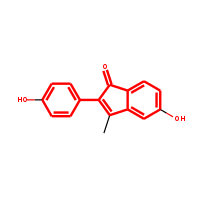

In [33]:
cpdsDF.head(1)

Now we can use pandas **groupby()** functionality and group by scaffolds and create a new frame with scaffolds sorted by number of members

In [34]:
sortedScaffolds = cpdsDF.groupby(['Murcko_SMILES']).count().sort(smiles, ascending=False)

-c:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [35]:
sortedScaffolds = sortedScaffolds[[smiles]] # Keep only smiles column
sortedScaffolds = sortedScaffolds.rename(columns={smiles:'count'}) # rename smiles column to count
sortedScaffolds['Murcko_SMILES'] = sortedScaffolds.index # actual SMILES are only in index column, move it
sortedScaffolds.index = range(len(sortedScaffolds)+1)[1:]
sortedScaffolds.head()

,count,Murcko_SMILES
1,66,c1ccc(-c2ccc3ccccc3c2)cc1
2,55,c1ccc(-c2nc3ccccc3o2)cc1
3,38,O=c1oc2ccccc2c2ccccc12
4,31,c1ccc(C2Sc3ccccc3OC2c2ccc(OCCN3CCCC3)cc2)cc1
5,29,c1ccc(-c2cc3ccccc3n2Cc2ccc(OCCN3CCCCC3)cc2)cc1


In [36]:
len(sortedScaffolds)

545

Add RDKit's ROMol column to scaffolds dataframe so we can visualize it

In [37]:
PandasTools.AddMoleculeColumnToFrame(sortedScaffolds, smilesCol='Murcko_SMILES')

<br>
<br>
<br>
#### FrameToGridImage(pandasFrame, legendsCol=, molsPerRow=)
Visualize molecules in data frame as a grid image
<br>
<br>
<br>

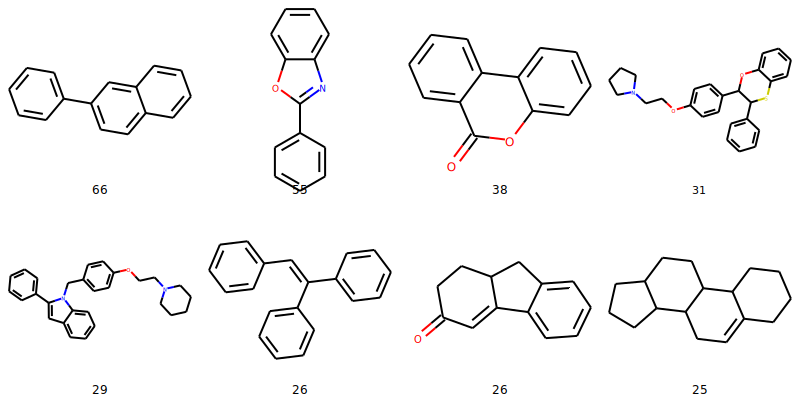

In [38]:
PandasTools.FrameToGridImage(sortedScaffolds.dropna().head(8), legendsCol='count', 
                             molsPerRow=4) # dropna() drops compounds without scaffold

Get compounds that belong to certain scaffold

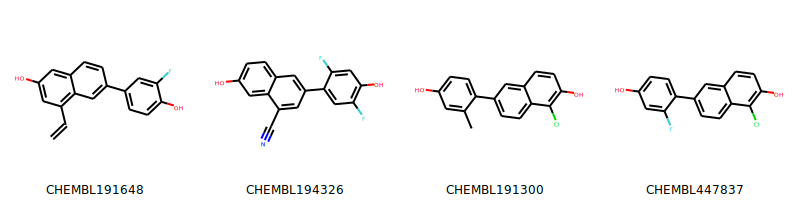

In [39]:
PandasTools.FrameToGridImage(cpdsDF[cpdsDF['Murcko_SMILES'] == 'c1ccc(-c2ccc3ccccc3c2)cc1'].head(4),
                            legendsCol=molnames, molsPerRow=4)

In [40]:
cpdsDF[cpdsDF['Murcko_SMILES'] == 'c1ccc(-c2ccc3ccccc3c2)cc1'
       ]['pIC50'].max() # min(), mean(), sum(), anything you can do with pandas Series

8.0

## Exploratory plots

In [41]:
%matplotlib inline

/home/samo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [42]:
import pylab

####  pIC50s of compounds with certain scaffolds

In [43]:
data = [cpdsDF[cpdsDF['Murcko_SMILES'] == x]['pIC50'] for x in sortedScaffolds['Murcko_SMILES'].head(8)]
data.append(cpdsDF[cpdsDF['knownDrug'] == 'Yes']['pIC50'])

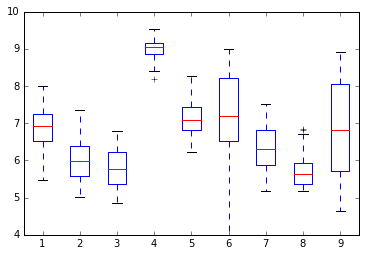

In [44]:
pylab.boxplot(data)
pylab.show()

####  Ligand efficiencies of compounds with certain scaffolds

In [45]:
data = [cpdsDF[cpdsDF['Murcko_SMILES'] == x]['LE'] for x in sortedScaffolds['Murcko_SMILES'].head(8)]
data.append(cpdsDF[cpdsDF['knownDrug'] == 'Yes']['LE'])

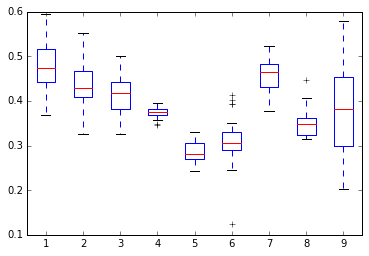

In [46]:
pylab.boxplot(data)
pylab.show()

<br>
<br>
<br>
<br>
<br>
<br>

### Check our GitHub https://github.com/Team-SKI/snippets
### Check our web page http://www.bio.mx.
<img src="files/biomedx.png">  
<br>
<img src="files/merck.jpeg">  
<br>
<img src="files/rdkit.png">  
<br>


# Thank you!

<br>
<br>
<br>
<br>
<br>
<br>

Copyright (C) 2013, 2014 by Samo Turk, [BioMed X GmbH](http://www.bio.mx)

This work is licensed under the Creative Commons Attribution-ShareAlike 3.0 License. To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/3.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
